# K nearest Neighbors (KNN) Simple Practise

Perfect. Let’s start small so you can see how KNN behaves before using it on a real-world dataset.

We’ll use a simple 2D dataset that classifies points into two groups — “Red” and “Blue”

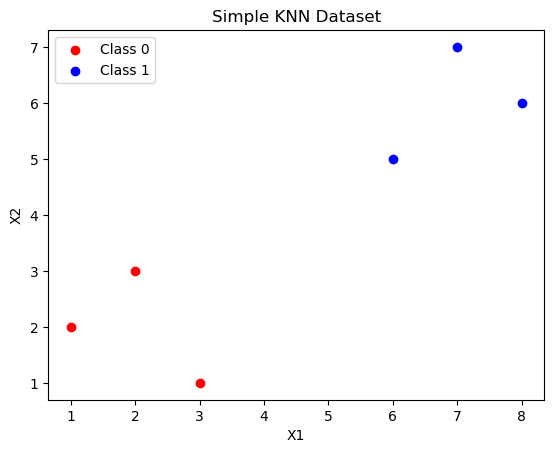

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Simple dataset
X = np.array([
    [1, 2], [2, 3], [3, 1],   # Class 0 (Red)
    [6, 5], [7, 7], [8, 6]    # Class 1 (Blue)
])

y = np.array([0, 0, 0, 1, 1, 1])  # Labels

# Visualize the points
plt.scatter(X[:3, 0], X[:3, 1], color='red', label='Class 0')
plt.scatter(X[3:, 0], X[3:, 1], color='blue', label='Class 1')
plt.legend()
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Simple KNN Dataset')
plt.show()

We’re just creating 6 points in 2D space — 3 red (class 0) and 3 blue (class 1). This helps visualize what KNN is doing.

### Step 2 - Train a KNN Model

In [17]:
#### Create and train KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

#### New data point to predict
new_point = np.array([[5, 4]])

#### Predict class
predicted_class = knn.predict(new_point)
print("Predicted class:", predicted_class)

Predicted class: [0]


We tell KNN to use k=3 (so it looks at 3 nearest neighbors). Then we predict what class [5, 4] belongs to.

### Step 3 - Visualize Prediction

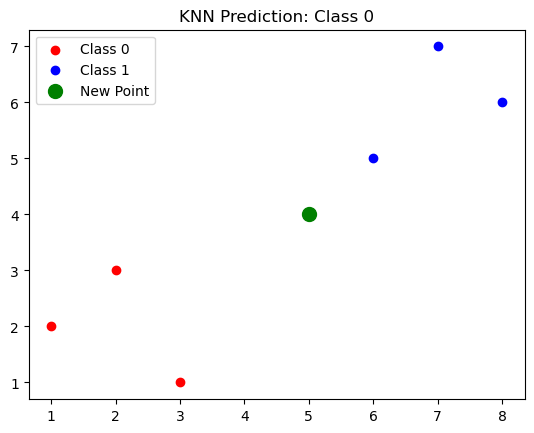

In [18]:
plt.scatter(X[:3, 0], X[:3, 1], color='red', label='Class 0')
plt.scatter(X[3:, 0], X[3:, 1], color='blue', label='Class 1')
plt.scatter(new_point[0, 0], new_point[0, 1], color='green', s=100, label='New Point')
plt.legend()
plt.title(f'KNN Prediction: Class {predicted_class[0]}')
plt.show()

To see who the closest neighbours are 

In [21]:
from numpy.linalg import norm

# Calculate distances from new_point to all training points
distances = [norm(point - new_point[0]) for point in X]

for i, d in enumerate(distances):
    print(f"Distance to point {X[i]} (class {y[i]}): {d:.2f}")

Distance to point [1 2] (class 0): 4.47
Distance to point [2 3] (class 0): 3.16
Distance to point [3 1] (class 0): 3.61
Distance to point [6 5] (class 1): 1.41
Distance to point [7 7] (class 1): 3.61
Distance to point [8 6] (class 1): 3.61


In [20]:
# Find the indices of the 3 nearest neighbors
neighbors_idx = np.argsort(distances)[:3]
print("Nearest neighbors (indices):", neighbors_idx)
print("Their classes:", y[neighbors_idx])

Nearest neighbors (indices): [3 1 2]
Their classes: [1 0 0]


So 0 wins (red)

Let's try this on a more realistic dataset.

That’s the full version of the Iris dataset and a great way to see KNN in proper action.

Here’s what we’ll do step-by-step:

	1.	Load the Iris dataset
	2.	Split into training and test sets
	3.	Train a KNN classifier
	4.	Make predictions and evaluate accuracy


In [24]:
# 1️⃣ Import libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# 2️⃣ Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# 3️⃣ Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4️⃣ Create and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # 5 neighbors is a good starting point
knn.fit(X_train, y_train)

# 5️⃣ Make predictions
y_pred = knn.predict(X_test)

# 6️⃣ Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


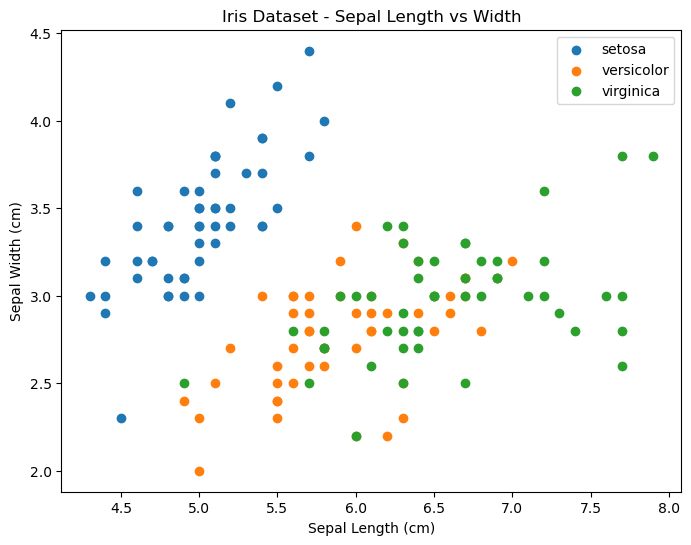

In [25]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Scatter plot (using first two features: sepal length, sepal width)
plt.figure(figsize=(8,6))
for i, target_name in enumerate(target_names):
    plt.scatter(X[y == i, 0], X[y == i, 1], label=target_name)

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Iris Dataset - Sepal Length vs Width')
plt.legend()
plt.show()

In [26]:
# Example new samples (sepal length, sepal width, petal length, petal width)
new_samples = np.array([
    [5.1, 3.5, 1.4, 0.2],  # likely Setosa
    [6.0, 2.9, 4.5, 1.5],  # likely Versicolor
    [6.5, 3.0, 5.2, 2.0]   # likely Virginica
])

# Predict
predictions = knn.predict(new_samples)

# Display results
for i, pred in enumerate(predictions):
    print(f"Sample {i+1}: Predicted class → {iris.target_names[pred]}")

Sample 1: Predicted class → setosa
Sample 2: Predicted class → versicolor
Sample 3: Predicted class → virginica


If you’d like to see where these new points fall on the plot, you can add this right after:

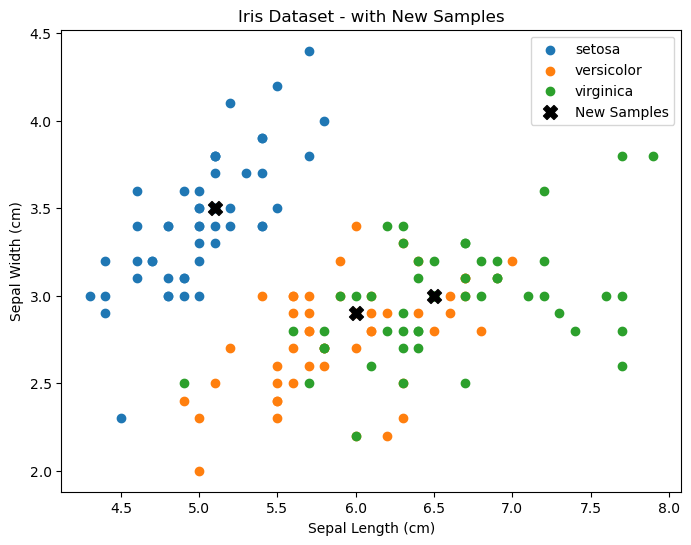

In [27]:
# Visualize new points (only using first two features for visualization)
plt.figure(figsize=(8,6))
for i, target_name in enumerate(target_names):
    plt.scatter(X[y == i, 0], X[y == i, 1], label=target_name)

# Plot new points
plt.scatter(new_samples[:, 0], new_samples[:, 1], color='black', marker='X', s=100, label='New Samples')

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Iris Dataset - with New Samples')
plt.legend()
plt.show()

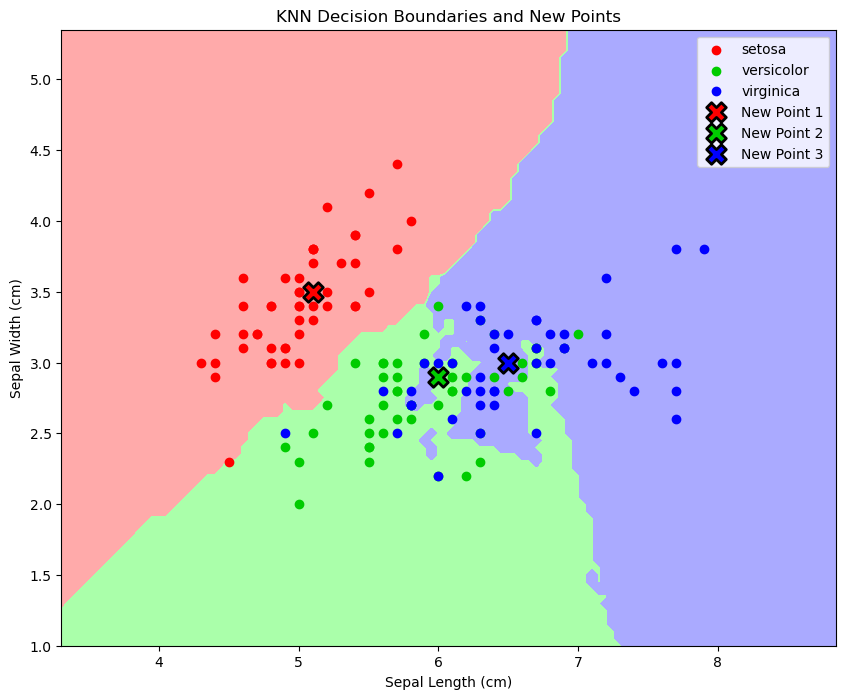

In [29]:
# Visualize decision boundaries and neighbors

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

# Load data (only first two features for clear plotting)
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target
target_names = iris.target_names

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

# Define grid for decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))

# Predict class for each point in grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Custom colors
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ['#FF0000', '#00CC00', '#0000FF']

# Plot decision boundary
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot training points
for i, target_name in enumerate(target_names):
    plt.scatter(X[y == i, 0], X[y == i, 1], label=target_name, color=cmap_bold[i])

# New points
new_points = np.array([
    [5.1, 3.5],  # likely Setosa
    [6.0, 2.9],  # likely Versicolor
    [6.5, 3.0]   # likely Virginica
])

preds = knn.predict(new_points)

# Plot new points
for i, pred in enumerate(preds):
    plt.scatter(new_points[i, 0], new_points[i, 1], color=cmap_bold[pred],
                edgecolor='black', marker='X', s=200, linewidth=2, label=f'New Point {i+1}')

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('KNN Decision Boundaries and New Points')
plt.legend()
plt.show()

In [31]:
# Show the distance between the new points and their neighbors
# Get distances and indices of nearest neighbors for each new point
distances, indices = knn.kneighbors(new_points)

for i, (dists, idxs) in enumerate(zip(distances, indices)):
    print(f"\nNew Point {i+1} ({new_points[i]}):")
    for dist, idx in zip(dists, idxs):
        print(f"  → Neighbor {idx}: Class={iris.target_names[y[idx]]}, Distance={dist:.3f}")


New Point 1 ([5.1 3.5]):
  → Neighbor 17: Class=setosa, Distance=0.000
  → Neighbor 0: Class=setosa, Distance=0.000
  → Neighbor 40: Class=setosa, Distance=0.100
  → Neighbor 43: Class=setosa, Distance=0.100
  → Neighbor 39: Class=setosa, Distance=0.100

New Point 2 ([6.  2.9]):
  → Neighbor 78: Class=versicolor, Distance=0.000
  → Neighbor 63: Class=versicolor, Distance=0.100
  → Neighbor 138: Class=virginica, Distance=0.100
  → Neighbor 61: Class=versicolor, Distance=0.141
  → Neighbor 149: Class=virginica, Distance=0.141

New Point 3 ([6.5 3. ]):
  → Neighbor 147: Class=virginica, Distance=0.000
  → Neighbor 104: Class=virginica, Distance=0.000
  → Neighbor 116: Class=virginica, Distance=0.000
  → Neighbor 75: Class=versicolor, Distance=0.100
  → Neighbor 137: Class=virginica, Distance=0.141
